# **Data analysis**

Attribute selected for evaluation: **ssc_p**

## Measures of central tendency and dispersion

In [12]:
import pandas as pd
import numpy as np

df= pd.read_csv('Placement_Data_Full_Class.csv')
ssc_p_data = df['ssc_p']

mean_ssc_p = np.mean(ssc_p_data)
median_ssc_p = np.median(ssc_p_data)
mode_ssc_p = ssc_p_data.mode().iloc[0]

variance_ssc_p = np.var(ssc_p_data)
std_deviation_ssc_p = np.std(ssc_p_data)
ssc_p_1qr = np.percentile(ssc_p_data, 25)
ssc_p_3qr = np.percentile(ssc_p_data, 75)

print("Measures of Central Tendency:")
print(f"Mean (Average): {mean_ssc_p}")
print(f"Median (Middle Value): {median_ssc_p}")
print("Mode (Most Frequently Occurring Value):", mode_ssc_p)

print("\nMeasures of Dispersion:")
print(f"Variance: {variance_ssc_p}")
print(f"Standard Deviation: {std_deviation_ssc_p}")
print(f"1st quartile: {ssc_p_1qr}")
print(f"3rd quartile: {ssc_p_3qr}")

Measures of Central Tendency:
Mean (Average): 67.30339534883721
Median (Middle Value): 67.0
Mode (Most Frequently Occurring Value): 62.0

Measures of Dispersion:
Variance: 116.68312847160627
Standard Deviation: 10.801996503961954
1st quartile: 60.599999999999994
3rd quartile: 75.7


## Visualization

C:\Users\elsaj\AppData\Local\Temp\ipykernel_8464\4264303872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=column_name, data=df, palette={"Placed": "green", "Not Placed": "red"})


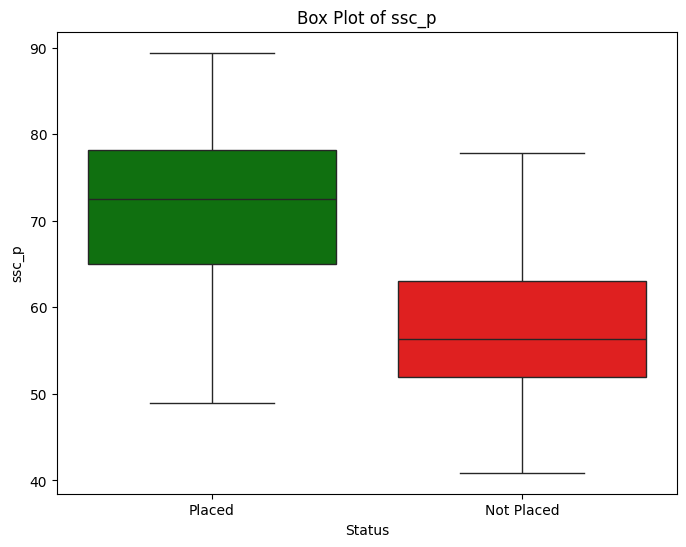

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
column_name = 'ssc_p'
sns.boxplot(x='status', y=column_name, data=df, palette={"Placed": "green", "Not Placed": "red"})
plt.title(f'Box Plot of {column_name}')
plt.xlabel('Status')
plt.ylabel(column_name)
plt.show()

## Data pre-processing

Data cleaning: Handling missing values

In [14]:
print('Salary column with null values:', df['salary'].isnull().sum(), sep = '\n')
df['salary'].fillna(value=0, inplace=True)
print('Salary column with null values after data cleaning:',df['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
67
Salary column with null values after data cleaning:
0


Data reduction: Recursive feature elimination

In [15]:
from sklearn.ensemble import RandomForestClassifier

# removing the serial no. column from the dataset
pl = df.iloc[:, 1:15]

# cleaning the data by assigning integer values to categorical attributes
pl['gender'].replace({"F":1, "M":0}, inplace = True)
pl['ssc_b'].replace({"Central":1, "Others":0}, inplace = True)
pl['hsc_b'].replace({"Central":1, "Others":0}, inplace = True)
pl['hsc_s'].replace({"Science":2, "Commerce":1, "Arts":0}, inplace = True)
pl['degree_t'].replace({"Sci&Tech":2, "Comm&Mgmt":1, "Others":0}, inplace = True)
pl['workex'].replace({"Yes":1, "No":0}, inplace = True)
pl['specialisation'].replace({"Mkt&Fin":1, "Mkt&HR":0}, inplace = True)
pl['status'].replace({"Placed":1, "Not Placed":0}, inplace = True)

# filling the missing values in the salary column - data cleaning
pl['salary'].fillna(value=0, inplace=True)

# assigning all the attributes to one variable and the target attribute to another variable
pl_x = pl.iloc[:, 0:11]
pl_y = pl.iloc[:, 12]

df = pl

# calculating the feature_importances_ of each attribute
rfc = RandomForestClassifier()
rfc.fit(pl_x, pl_y)

rfe_importance = pd.DataFrame({"feature_name":pl_x.columns, "Importance":list(rfc.feature_importances_)})

# printing feature_importances_ in descending order so that the attributes to keep can be selected easily
print(rfe_importance.sort_values(["Importance"], ascending=False))


      feature_name  Importance
1            ssc_p    0.293239
3            hsc_p    0.219868
6         degree_p    0.198425
9          etest_p    0.102897
8           workex    0.040265
10  specialisation    0.033681
0           gender    0.027817
7         degree_t    0.027766
5            hsc_s    0.020350
2            ssc_b    0.019572
4            hsc_b    0.016120


## Normalization

Attribute selected for normalization: **salary**

In [16]:
salary_data = df['salary']

mean_salary = df['salary'].mean()
max_salary = df['salary'].max()
min_salary = df['salary'].min()
print(f"Before normalization:")
print(f"\tMin: {min_salary}")
print(f"\tMax: {max_salary}")
print(f"\tMean: {mean_salary}")

# Perform Min-Max normalization for the chosen attribute
min_value = df['salary'].min()
max_value = df['salary'].max()

# Normalize the attribute and add it as a new column
df['normalized_salary'] = (df['salary'] - min_value) / (max_value - min_value)

# Remove the original attribute from the DataFrame
df.drop(columns=['salary'], inplace=True)

new_mean_salary = df['normalized_salary'].mean()
new_min_salary = df['normalized_salary'].min()
new_max_salary = df['normalized_salary'].max()
print(f"\nAfter normalization:")
print(f"\tMin: {new_min_salary}")
print(f"\tMax: {new_max_salary}")
print(f"\tMean: {new_mean_salary}")


Before normalization:
	Min: 0.0
	Max: 940000.0
	Mean: 198702.32558139536

After normalization:
	Min: 0.0
	Max: 1.0
	Mean: 0.21138545274616527
